In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_data(train_data, test_data):
    # 1. Replace "?" with np.nan so pandas recognizes them as nulls
    train_data = train_data.replace('?', np.nan)
    test_data = test_data.replace('?', np.nan)
    
    # 2. Identify columns with missing values
    columns_with_nan = ['workclass', 'occupation', 'native.country'] # Common columns with '?'
    
    for col in columns_with_nan:
        # Calculate the mode from the training data only to avoid data leakage
        mode_value = train_data[col].mode()[0]
        
        # 3. Fill the missing values with the mode
        train_data[col] = train_data[col].fillna(mode_value)
        test_data[col] = test_data[col].fillna(mode_value)
        
    return train_data, test_data

In [3]:
def plot_numeric_feature_correlation(train_data):
    corr = train_data.select_dtypes(include='number').corr()
    
    # Plot heatmap
    plt.figure(figsize=(8,8))

    sns.heatmap(corr, annot=True, cmap='Oranges_r')
    plt.title('Correlation between different features')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

In [4]:
def plot_histogram(train_data):

    low_income = train_data[train_data['income'] == 0] 
    high_income = train_data[train_data['income'] == 1]
    
    columns = [col for col in train_data.columns if col != 'income']
    
    for col in columns:
        
        if train_data[col].dtype in ['int64', 'float64']:
            plt.hist([low_income[col], high_income[col]], label=['<=50K', '>50K'])
        else:
            plt.hist([low_income[col], high_income[col]], label=['<=50K', '>50K'])
            plt.xticks(rotation=45, ha='right')
        
        plt.title(f'Column:{col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [5]:
# Load data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [6]:
clean_data(train_data, test_data)

(       age         workclass  fnlwgt     education  education.num  \
 0       48           Private  191858  Some-college             10   
 1       54           Private  145419       HS-grad              9   
 2       43           Private  182757       HS-grad              9   
 3       32           Private  191777     Assoc-voc             11   
 4       43         State-gov  206139     Bachelors             13   
 ...    ...               ...     ...           ...            ...   
 26044   34  Self-emp-not-inc   56964       HS-grad              9   
 26045   23           Private  204209  Some-college             10   
 26046   44       Federal-gov  113597  Some-college             10   
 26047   23           Private  103632       HS-grad              9   
 26048   31           Private   56026       HS-grad              9   
 
            marital.status         occupation   relationship   race     sex  \
 0      Married-civ-spouse       Craft-repair        Husband  White    Male   


In [7]:
#now use cleaned data
train_data = pd.read_csv('cleaned_train_data.csv')
test_data = pd.read_csv('cleaned_test_data.csv')

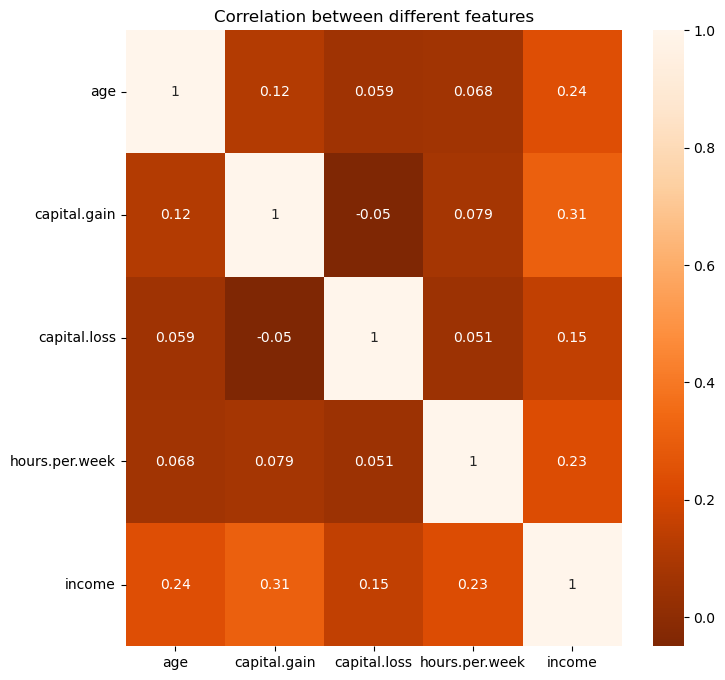

In [8]:
plot_numeric_feature_correlation(train_data)

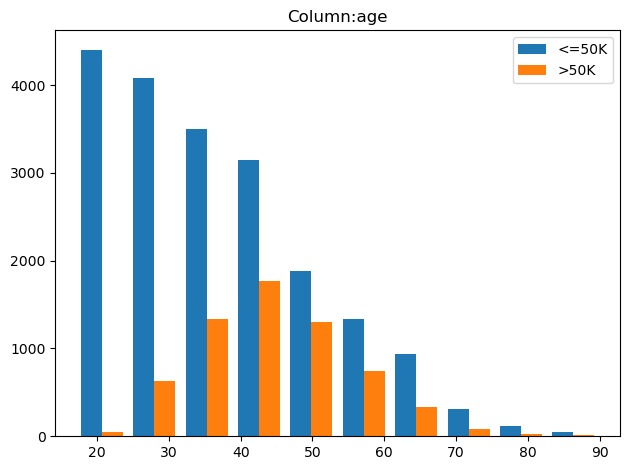

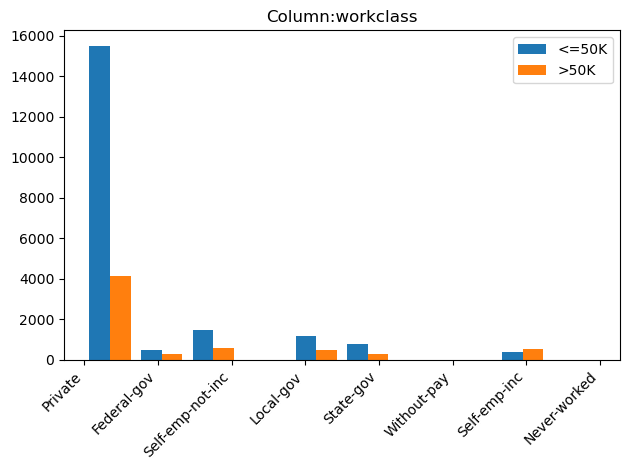

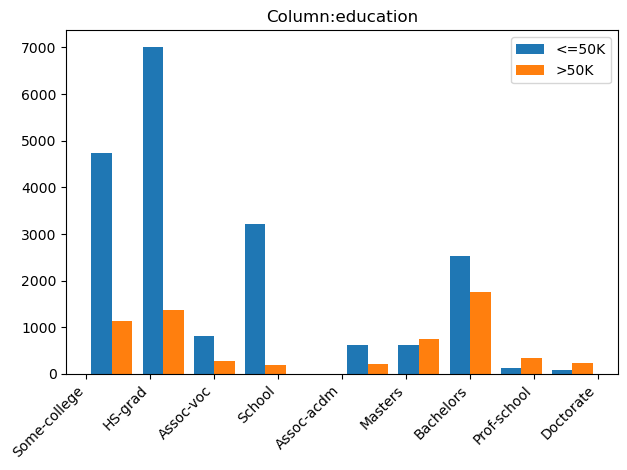

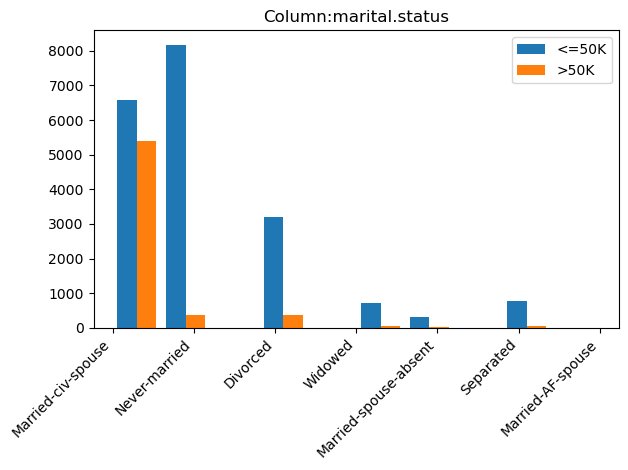

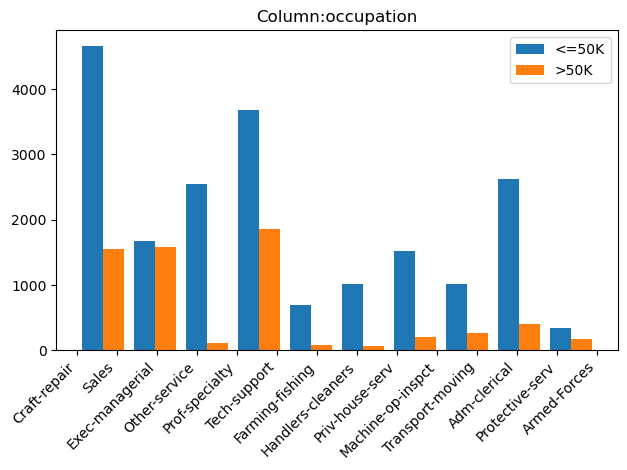

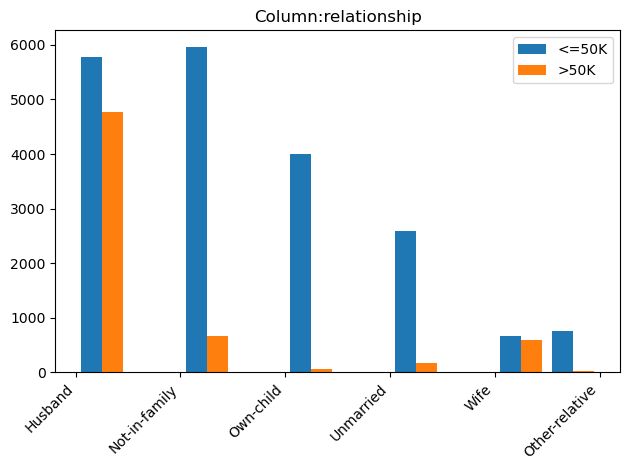

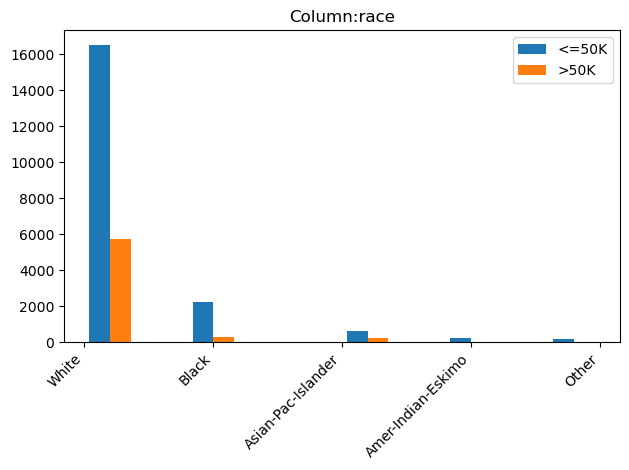

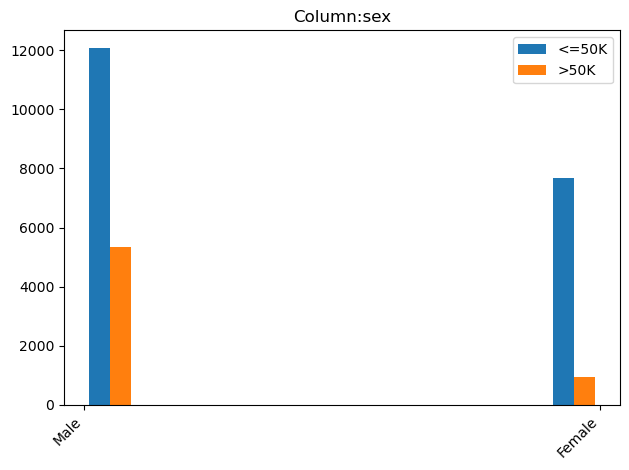

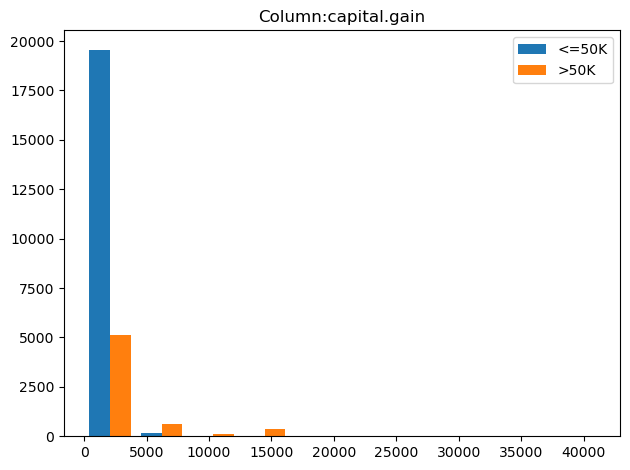

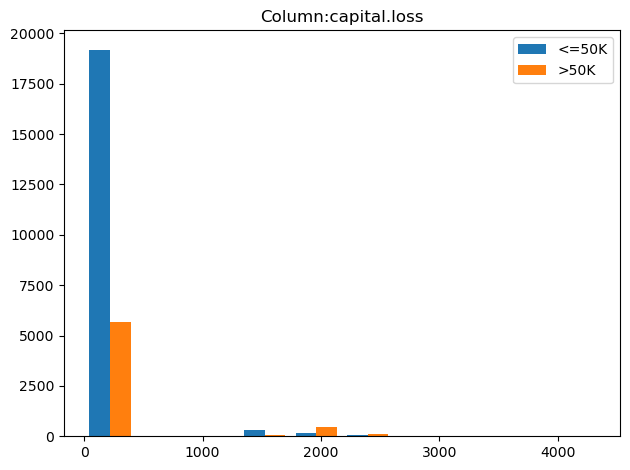

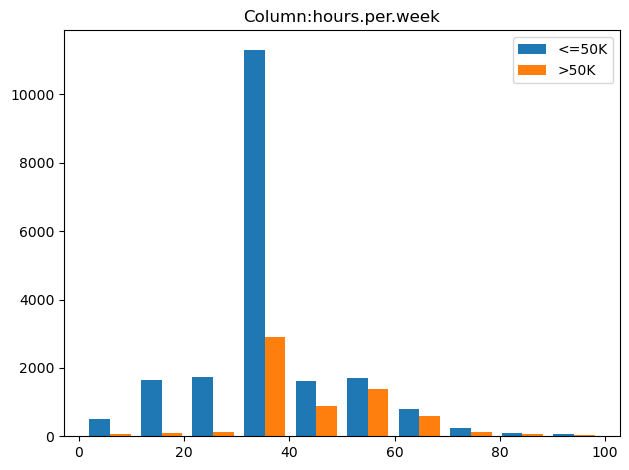

In [24]:
plot_histogram(train_data)